# Checking Mizuki performance

Zooey Nguyen

2021-07-09

Requires a file of galaxies with specz and Mizuki photo-z's already cross-matched in TOPCAT.

In [1]:
from photoz_utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setup data

In [2]:
matched_df = import_photoz_data('/data/HSC/crossmatched_mizuki.csv')
matched_df.columns

Index(['# object_id_1', 'specz_redshift_err', 'specz_redshift', 'specz_mag_i',
       'specz_name', 'specz_ra', 'specz_dec', 'ra', 'dec', 'coord',
       'skymap_id', 'g_cmodel_mag', 'r_cmodel_mag', 'i_cmodel_mag',
       'z_cmodel_mag', 'y_cmodel_mag', 'g_cmodel_magsigma',
       'r_cmodel_magsigma', 'i_cmodel_magsigma', 'z_cmodel_magsigma',
       'y_cmodel_magsigma', '# object_id_2', 'photoz_mean', 'photoz_mode',
       'photoz_median', 'photoz_best', 'photoz_mc'],
      dtype='object')

<AxesSubplot:xlabel='specz_redshift', ylabel='photoz_best'>

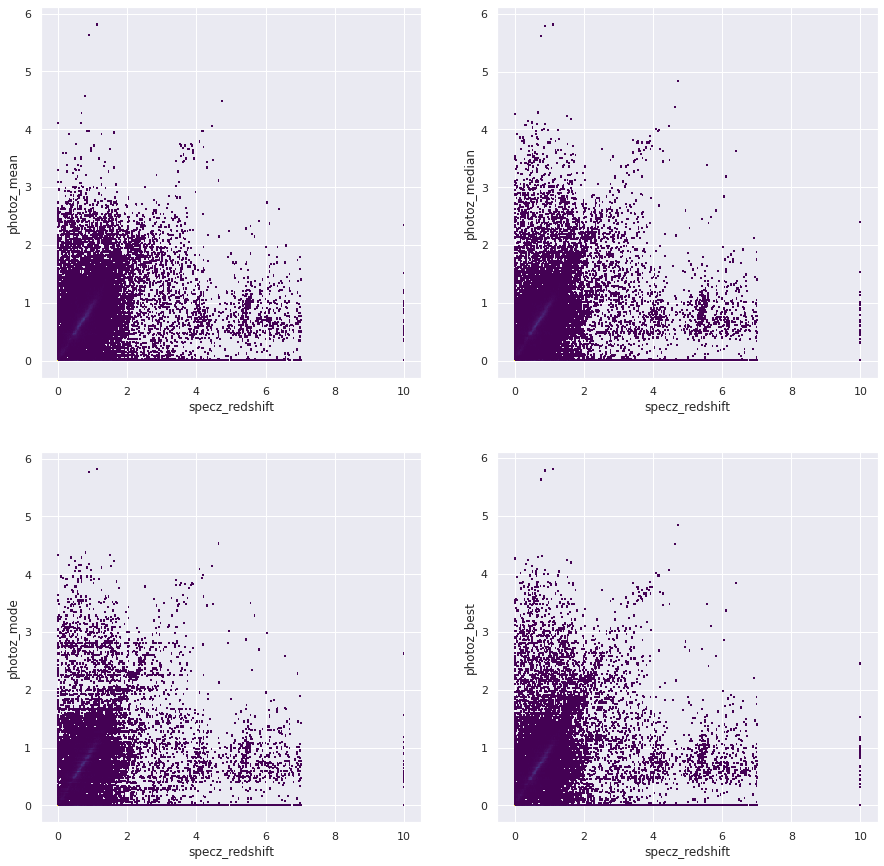

In [3]:
sns.set(rc={'figure.figsize':(15,15)})
fig, axes = plt.subplots(2, 2)
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_mean'], cmap='viridis', ax=axes[0,0])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_median'], cmap='viridis', ax=axes[0,1])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_mode'], cmap='viridis', ax=axes[1,0])
sns.histplot(x=matched_df['specz_redshift'], y=matched_df['photoz_best'], cmap='viridis', ax=axes[1,1])

## Photoz_best performance

In [4]:
z_photo = matched_df['photoz_best']
z_spec = matched_df['specz_redshift']

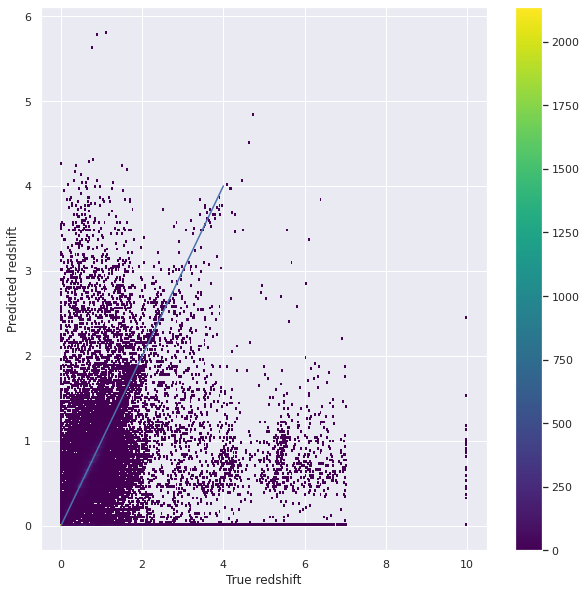

In [5]:
plot_predictions(matched_df['photoz_best'], matched_df['specz_redshift'])

In [6]:
metrics = get_point_metrics(z_spec, z_photo, binned=True)
metrics

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",2595,0.446465,0.043849,0.065169,0.223306,0.161357,0.326397,0.426975
1,"(0.2, 0.4]",4033,0.355865,0.033934,0.032750,0.151719,0.120504,0.168361,0.337962
2,"(0.4, 0.6]",11312,0.232516,0.011427,0.014735,0.072319,0.057232,0.205888,0.200318
3,"(0.6, 0.8]",15422,0.157557,0.011105,0.013110,0.049782,0.042204,0.165089,0.114123
4,"(0.8, 1.0]",11373,0.180201,0.012032,0.013300,0.058086,0.048454,0.178669,0.136903
5,"(1.0, 1.2]",4186,0.296541,-0.001306,0.003980,0.115713,0.082520,0.190397,0.277353
6,"(1.2, 1.4]",1702,0.432998,-0.082033,-0.053201,0.210439,0.163159,0.098707,0.450646
7,"(1.4, 1.6]",902,0.556459,-0.166441,-0.160327,0.254376,0.249931,0.086475,0.626386
8,"(1.6, 1.8]",554,0.550049,-0.145814,-0.115139,0.281082,0.231803,0.075812,0.592058
9,"(1.8, 2.0]",497,0.511271,-0.127031,-0.088421,0.274096,0.231034,0.052314,0.559356


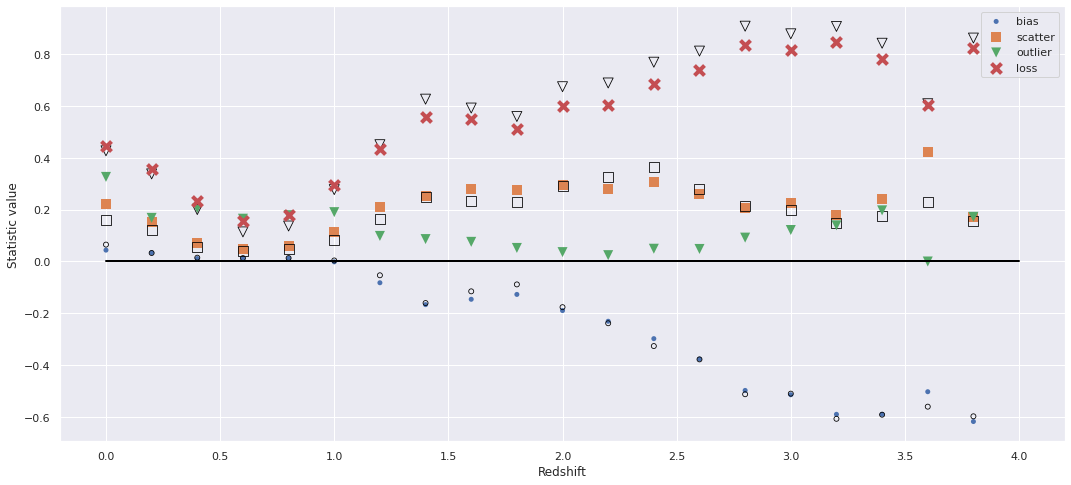

In [7]:
plot_point_metrics(metrics)